import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime 
import warnings
warnings.filterwarnings('ignore')

In [7]:
df= pd.read_csv('onlineRetail.csv')
print("shape:",df.shape)

shape: (541909, 9)


In [ ]:
print (df.info)

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

       InvoiceDate      time  UnitPrice  Cu

In [5]:
print (df.describe())

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [6]:
print (df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
time                0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [10]:
print(df.dtypes)

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
time            object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [14]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'],errors='coerce')
df['InvoiceNo']=df['InvoiceNo'].astype(str)
df['StockCode']=df['StockCode'].astype(str)
df['CustomerID']=df['CustomerID'].fillna (0).astype(int)

In [106]:
print(df.dtypes)

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
time                   object
UnitPrice             float64
CustomerID              int64
Country                object
total_price           float64
yearmonth           period[M]
month                  object
dayofweek              object
dtype: object


In [148]:
#create total price 

df['total_price']=df['Quantity']* df['UnitPrice']
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

  InvoiceDate      time  UnitPrice  CustomerID         Country  total_price  \
0  2010-01-12  00:00:00       2.55       17850  United Kingdom        15.30   
1  2010-01-12  08:26:00       3.39       17850  United Kingdom        20.34   
2  2010-01-12  08:26:00       2.75       17850  United Kingdom        22.00   
3  2010-01-12  08:26:00       3.39       17850  United Kingdom        20.34   
4  2010-01-12  08:26:00       3.39       17850  United Kingdom        20.34   

  yearmonth    month dayofweek  
0   2010-01  January   Tuesday  
1   2010-01  January   Tue

In [149]:
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'time', 'UnitPrice', 'CustomerID', 'Country', 'total_price',
       'yearmonth', 'month', 'dayofweek'],
      dtype='object')


In [150]:
 #add data features 
df['yearmonth']=df['InvoiceDate'].dt.to_period('M')
df['month']=df['InvoiceDate'].dt.month_name()
df['dayofweek']=df['InvoiceDate'].dt.day_name()
print (df.head())
print (df.shape)

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

  InvoiceDate      time  UnitPrice  CustomerID         Country  total_price  \
0  2010-01-12  00:00:00       2.55       17850  United Kingdom        15.30   
1  2010-01-12  08:26:00       3.39       17850  United Kingdom        20.34   
2  2010-01-12  08:26:00       2.75       17850  United Kingdom        22.00   
3  2010-01-12  08:26:00       3.39       17850  United Kingdom        20.34   
4  2010-01-12  08:26:00       3.39       17850  United Kingdom        20.34   

  yearmonth    month dayofweek  
0   2010-01  January   Tuesday  
1   2010-01  January   Tue

In [151]:
total_rev = df['total_price'].sum()
total_orders = df['InvoiceNo'].nunique()
unique_customer = df['CustomerID'].nunique()

print(f"Total Revenue: £{total_rev:,.2f}, Orders: {total_orders}, no of Customers: {unique_customer}")

Total Revenue: £9,747,747.93, Orders: 25900, no of Customers: 4373


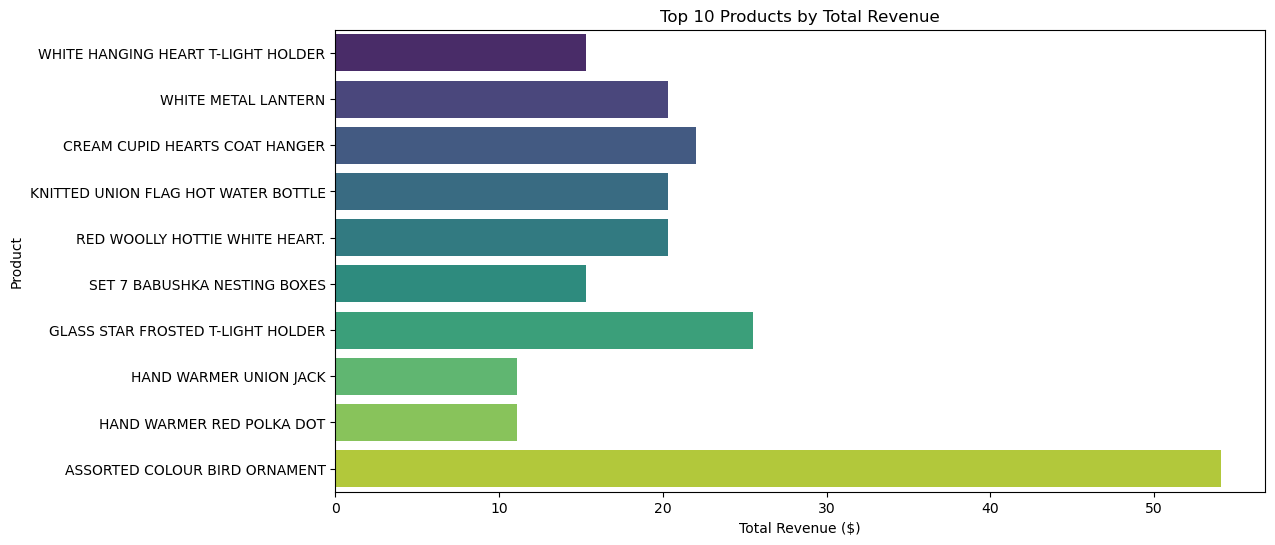

In [152]:
import plotly.express as px
df.product_revenue=df[['Description','total_price']]
top_product=df.product_revenue.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='total_price', y='Description', data=top_product, palette='viridis')
plt.title('Top 10 Products by Total Revenue')
plt.xlabel('Total Revenue ($)')
plt.ylabel('Product')
plt.show()

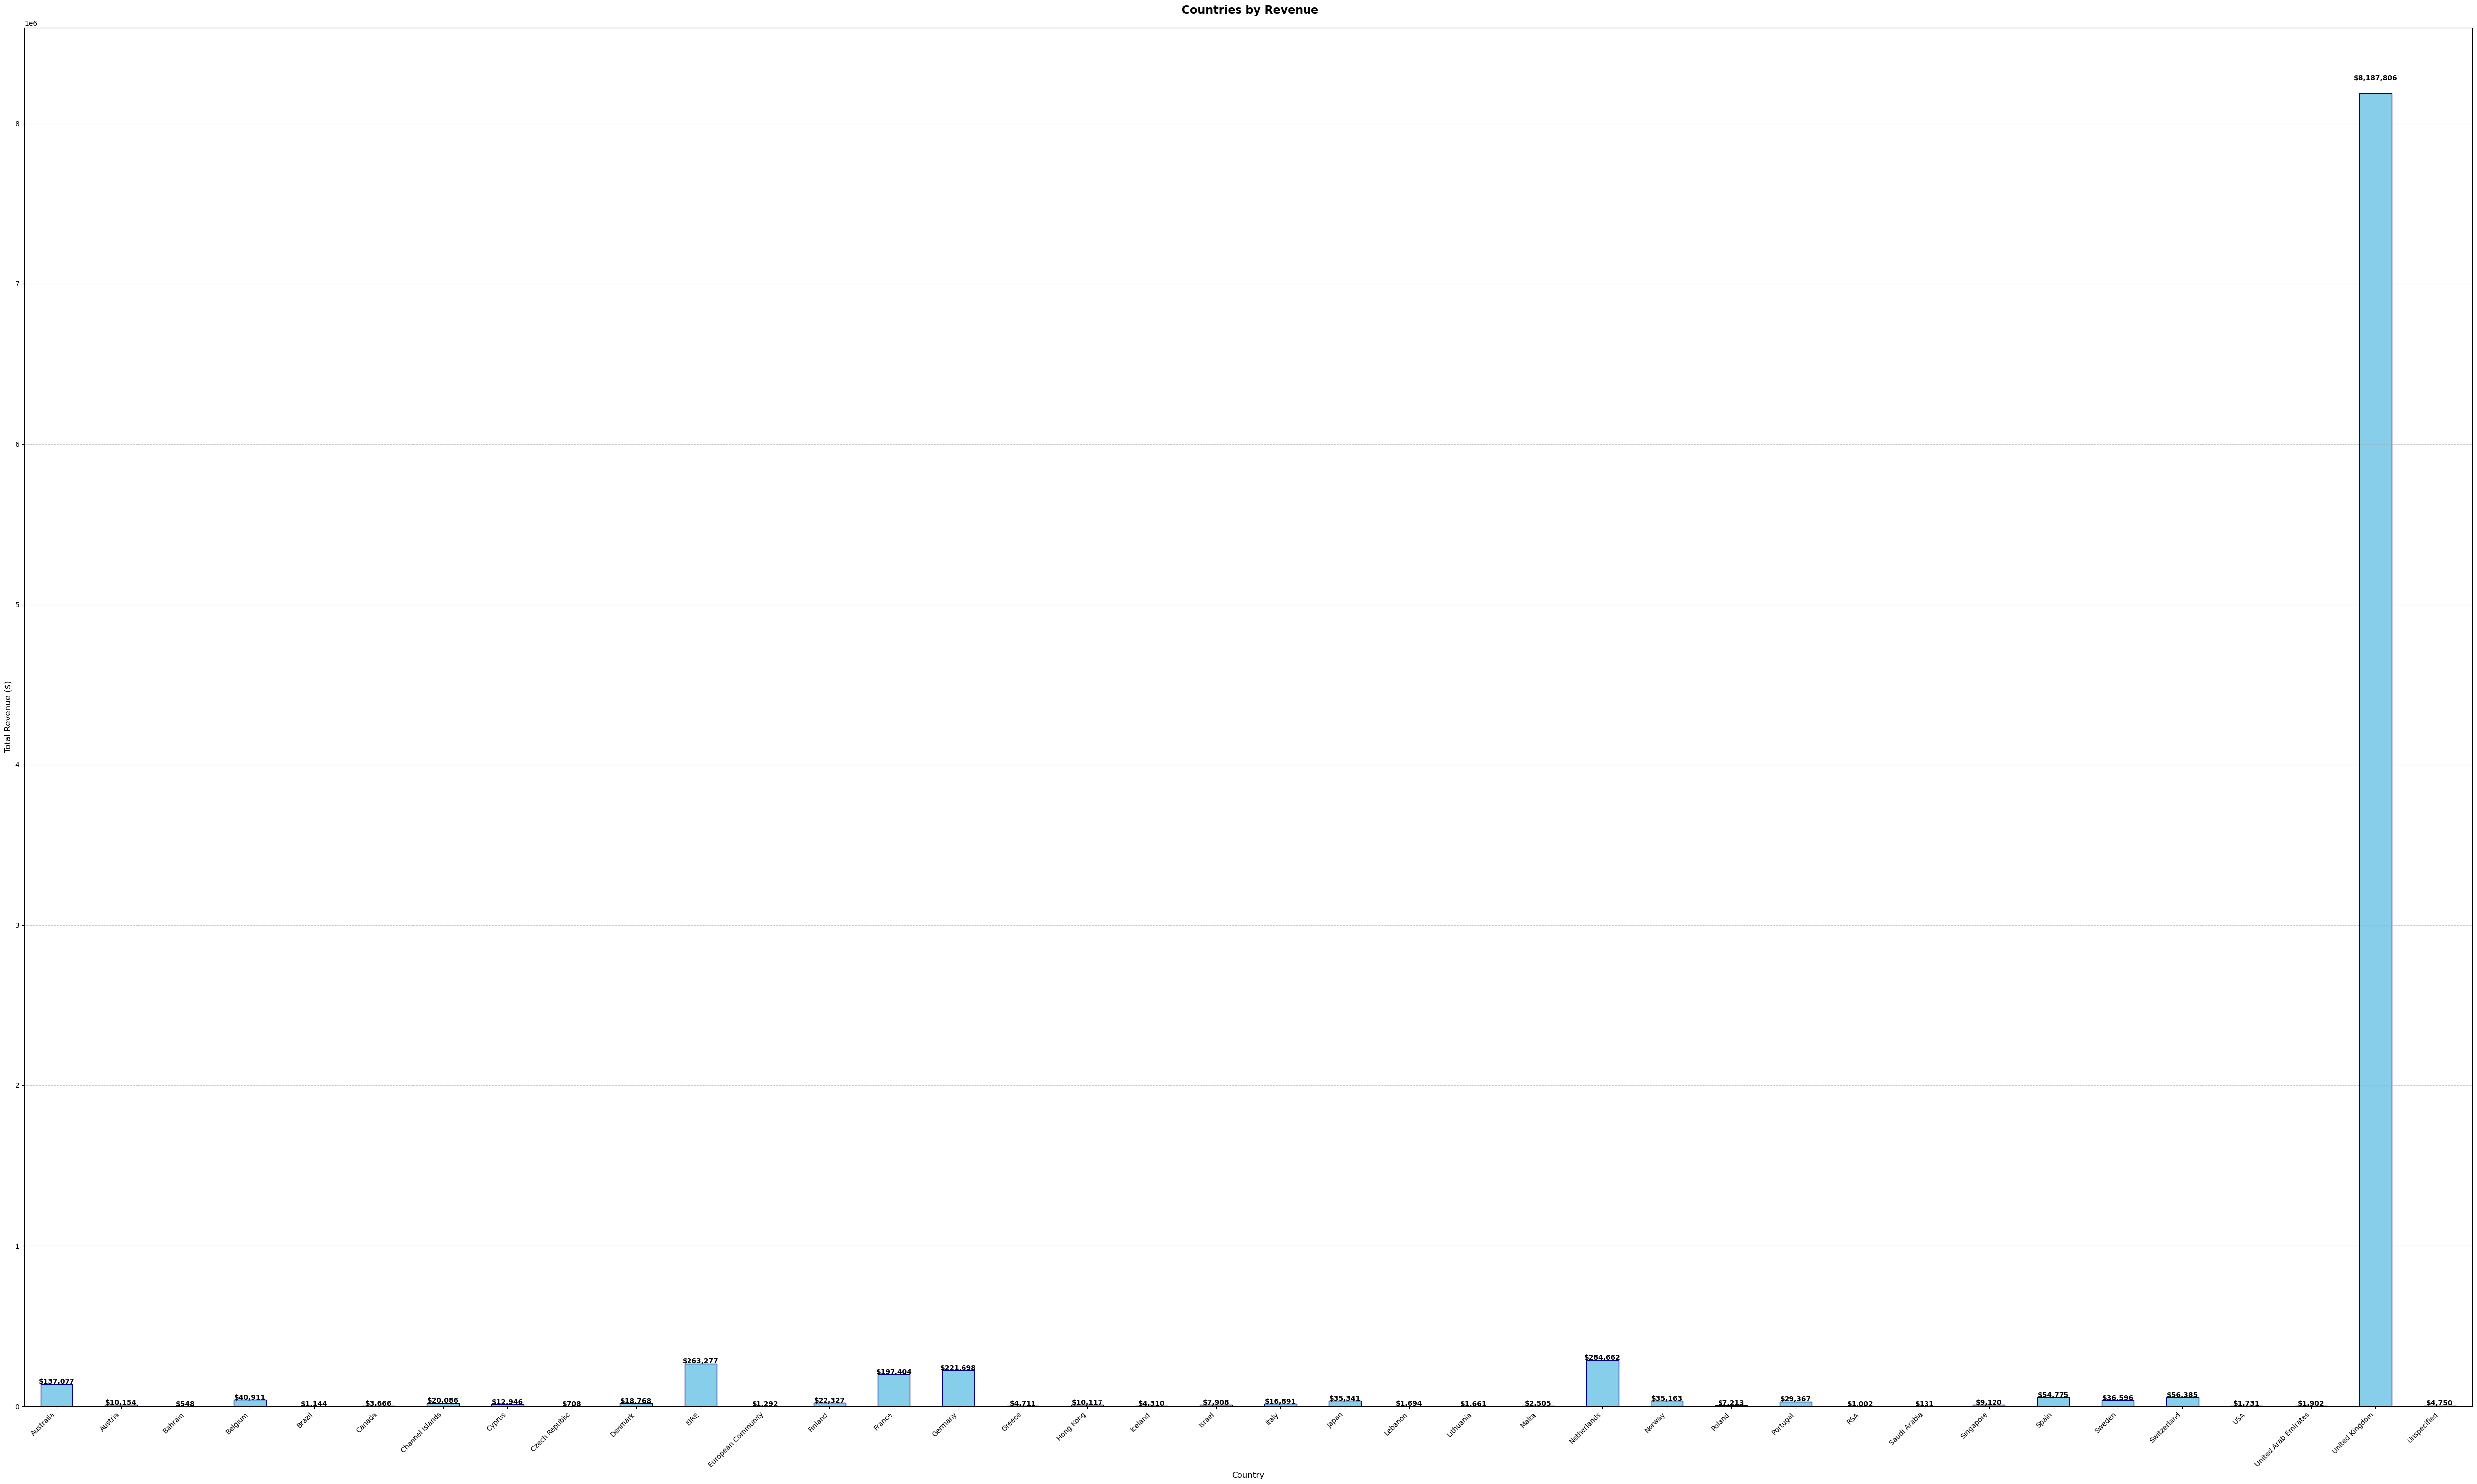

In [153]:
import matplotlib.pyplot as plt
country_revenue=df.groupby('Country')['total_price'].sum()
# 1. Increase figure size for readability
plt.figure(figsize=(50, 30))

# 2. Add color and edge styling
bars = country_revenue.plot(kind='bar', color='skyblue', edgecolor='navy')

# 3. Improve Title and Label aesthetics
plt.title(' Countries by Revenue', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xlabel('Country', fontsize=12)

# 4. Rotate x-axis labels to prevent overlap
plt.xticks(rotation=45, ha='right')

# 5. Add data labels on top of each bar
for i, v in enumerate(country_revenue):
    plt.text(i, v + (v * 0.01), f'${v:,.0f}', ha='center', fontweight='bold')

# 6. Add a subtle grid for the y-axis only
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

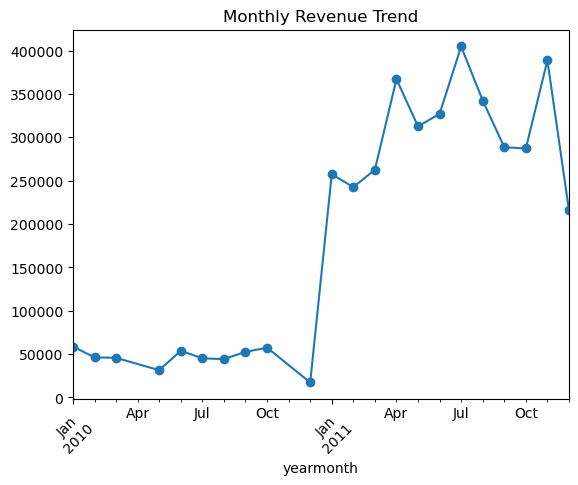

In [154]:
monthly = df.groupby('yearmonth')['total_price'].sum()
monthly.plot(kind='line', marker='o')
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=45)
plt.show()

In [157]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days, 
    'InvoiceNo': 'nunique',  
    'total_price': 'sum' }).round(2)
rfm.columns = ['Recency', 'Frequency', 'Monetary']
top_cust = rfm.sort_values('Monetary', ascending=False).head(10)
print(top_cust)

            Recency  Frequency    Monetary
CustomerID                                
0               0.0       3710  1447682.12
14646           2.0         77   279489.02
18102          89.0         62   256438.49
17450           3.0         55   187482.17
14911           0.0        248   132572.62
12415          70.0         26   123725.45
14156           0.0         66   113384.14
17511           6.0         46    88125.38
16684          95.0         31    65892.08
13694          61.0         60    62653.10


In [162]:
df.to_csv('cleaned_retail_1.csv')